# Instalando as dependências



In [ ]:
# instalamos datasets, uma biblioteca também da hugging face
# !pip install datasets

# Baixando o dataset do Kaggle

In [65]:
import kagglehub
import shutil


# Download latest version
path = kagglehub.dataset_download("aadyasingh55/sexism-detection-in-english-texts")

print("Path to dataset files:", path)

# Move to content folder
shutil.move(path, "./sexism")




100%|██████████| 1.26M/1.26M [00:02<00:00, 531kB/s]

Extracting files...
Path to dataset files: /home/gustavo/.cache/kagglehub/datasets/aadyasingh55/sexism-detection-in-english-texts/versions/1


'./sexism'

# Carregando o dataset

In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("./sexism")

/home/gustavo/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Visualizando o dataset

In [91]:
import pandas as pd

# train_df = dataset['train'].to_pandas()
# test_df = dataset['test'].to_pandas()

train_df = pd.read_csv("./sexism/train (2).csv")
test_df = pd.read_csv("./sexism/test (1).csv")

train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
 5   split           14000 non-null  object
dtypes: object(6)
memory usage: 656.4+ KB


,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
1,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
2,sexism2022_english-13021,woman?,not sexist,none,none,train
3,sexism2022_english-14998,Unlicensed day care worker reportedly tells co...,not sexist,none,none,train
4,sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear min...,sexist,3. animosity,3.3 backhanded gendered compliments,train


In [92]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       4000 non-null   object
 1   text            4000 non-null   object
 2   label_sexist    4000 non-null   object
 3   label_category  4000 non-null   object
 4   label_vector    4000 non-null   object
 5   split           4000 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-845,Fuck the niggers and the jews. Both have a his...,not sexist,none,none,test
1,sexism2022_english-6629,Well then good because someone has to knock he...,sexist,2. derogation,2.2 aggressive and emotive attacks,test
2,sexism2022_english-17573,#USA #Texas #Islam #Muslims #Islamization #Sha...,not sexist,none,none,test
3,sexism2022_english-10268,"Yes, normal women want to be dominated. Social...",sexist,2. derogation,2.1 descriptive attacks,test
4,sexism2022_english-10735,She didn't have to be a bitch about it. She li...,sexist,2. derogation,2.2 aggressive and emotive attacks,test


In [3]:
train_df.describe()

,rewire_id,text,label_sexist,label_category,label_vector,split
count,14000,14000,14000,14000,14000,14000
unique,14000,13999,2,5,12,1
top,sexism2022_english-13612,#NAME?,not sexist,none,none,train
freq,1,2,10602,10602,10602,14000


In [4]:
test_df.describe()

,rewire_id,text,label_sexist,label_category,label_vector,split
count,4000,4000,4000,4000,4000,4000
unique,4000,4000,2,5,12,1
top,sexism2022_english-9106,post evidence fuckface,not sexist,none,none,test
freq,1,1,3030,3030,3030,4000


In [6]:
print(train_df['split'].unique())
print(test_df['split'].unique())

['train']
['test']


Coluna split possui o mesmo valor em todas as linhas, então não será necessário para a análise.

In [93]:
train_df.drop(columns=['split'], inplace=True)
test_df.drop(columns=['split'], inplace=True)

In [94]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
dtypes: object(5)
memory usage: 547.0+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       4000 non-null   object
 1   text            4000 non-null   object
 2   label_sexist    4000 non-null   object
 3   label_category  4000 non-null   object
 4   label_vector    4000 non-null   object
dtypes: object(5)
memory usage: 156.4+ KB


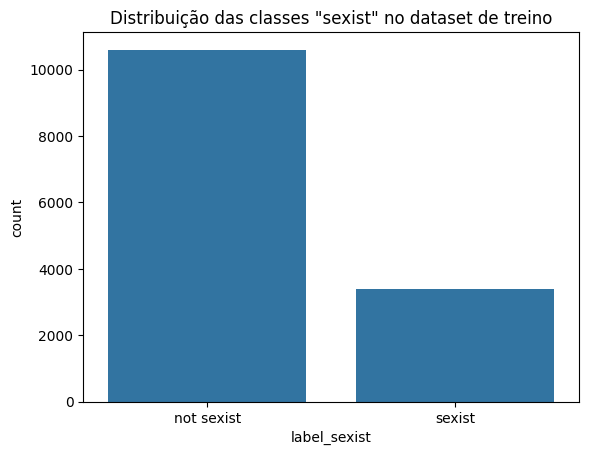

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label_sexist', data=train_df)
plt.title('Distribuição das classes "sexist" no dataset de treino')
plt.show()

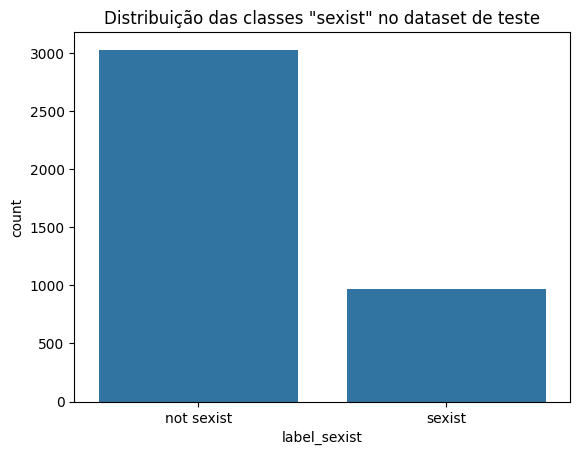

In [11]:
sns.countplot(x='label_sexist', data=test_df)
plt.title('Distribuição das classes "sexist" no dataset de teste')
plt.show()

In [15]:
print(train_df['label_category'].unique())
print(test_df['label_category'].unique())

['none' '3. animosity' '2. derogation' '4. prejudiced discussions'
 '1. threats, plans to harm and incitement']
['none' '2. derogation' '3. animosity' '4. prejudiced discussions'
 '1. threats, plans to harm and incitement']


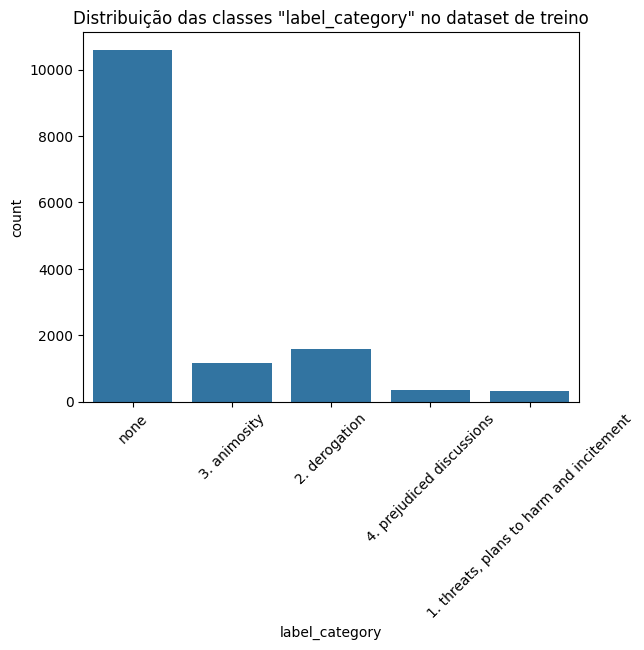

In [31]:
sns.countplot(x='label_category', data=train_df)
plt.title('Distribuição das classes "label_category" no dataset de treino')
plt.xticks(rotation=45)
plt.show()

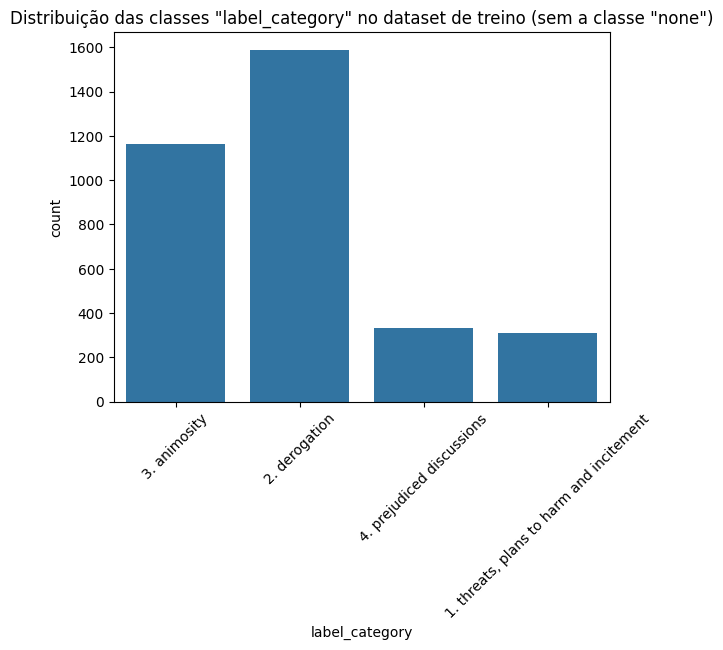

In [30]:
sns.countplot(x='label_category', data=train_df.loc[train_df['label_category'] != 'none'])
plt.title('Distribuição das classes "label_category" no dataset de treino (sem a classe "none")')
plt.xticks(rotation=45)
plt.show()

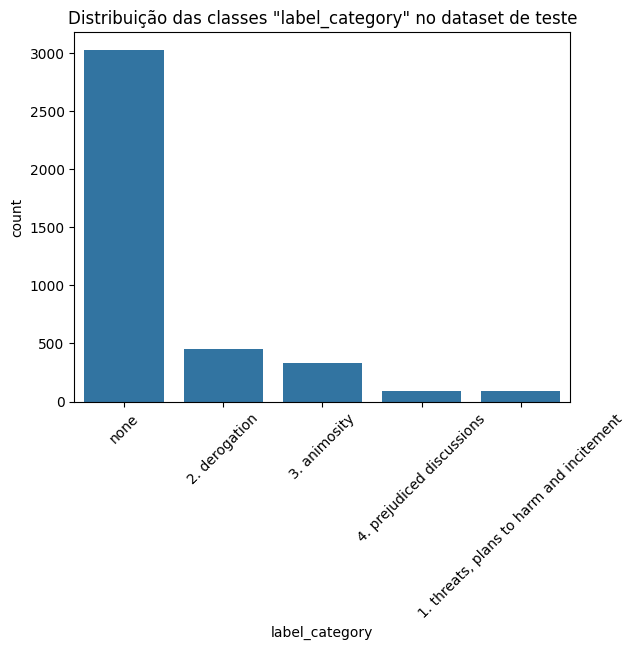

In [29]:
sns.countplot(x='label_category', data=test_df)
plt.title('Distribuição das classes "label_category" no dataset de teste')
plt.xticks(rotation=45)
plt.show()

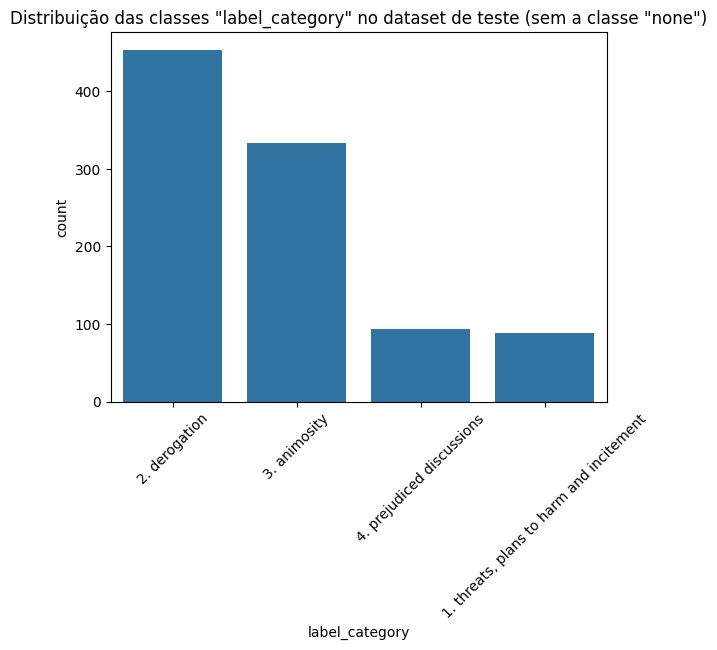

In [28]:
sns.countplot(x='label_category', data=test_df.loc[test_df['label_category'] != 'none'])
plt.title('Distribuição das classes "label_category" no dataset de teste (sem a classe "none")')
plt.xticks(rotation=45)
plt.show()

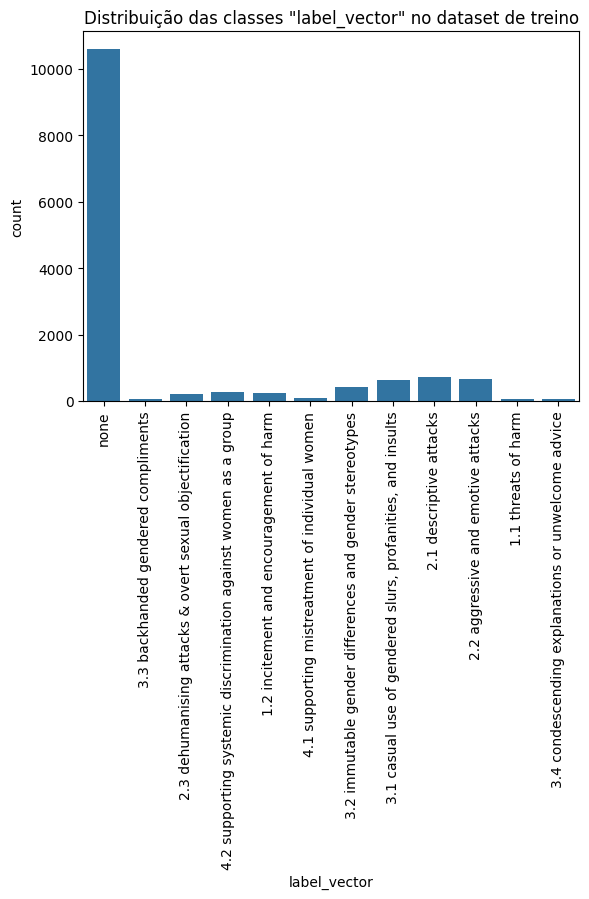

In [43]:
sns.countplot(x='label_vector', data=train_df)
plt.title('Distribuição das classes "label_vector" no dataset de treino')
plt.xticks(rotation=90)
plt.show()

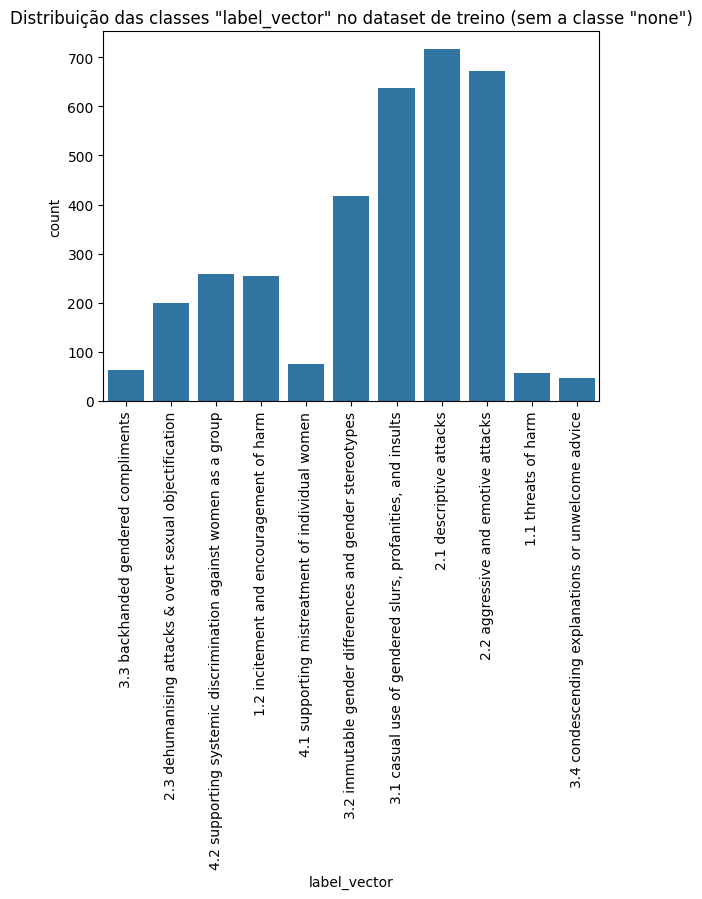

In [42]:
sns.countplot(x='label_vector', data=train_df.loc[train_df['label_vector'] != 'none'])
plt.title('Distribuição das classes "label_vector" no dataset de treino (sem a classe "none")')
plt.xticks(rotation=90)
plt.show()

Para simplificar o problema, vamos apenas classificar se os textos foram sexistas ou não, não levando em consideração a coluna label_category e label_vector.

In [95]:
train_df.drop(columns=['label_category'], inplace=True)
test_df.drop(columns=['label_category'], inplace=True)

train_df.drop(columns=['label_vector'], inplace=True)
test_df.drop(columns=['label_vector'], inplace=True)

In [96]:
train_df.info()

train_df.describe()

train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rewire_id     14000 non-null  object
 1   text          14000 non-null  object
 2   label_sexist  14000 non-null  object
dtypes: object(3)
memory usage: 328.2+ KB


,rewire_id,text,label_sexist
0,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist
1,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist
2,sexism2022_english-13021,woman?,not sexist
3,sexism2022_english-14998,Unlicensed day care worker reportedly tells co...,not sexist
4,sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear min...,sexist


In [46]:
train_df.describe()

,rewire_id,text,label_sexist
count,14000,14000,14000
unique,14000,13999,2
top,sexism2022_english-13612,#NAME?,not sexist
freq,1,2,10602


Tambeém vamos remover a coluna rewire_id, pois ela não é relevante para a análise.

In [97]:
train_df.drop(columns=['rewire_id'], inplace=True)
test_df.drop(columns=['rewire_id'], inplace=True)

Por fim vamos validar se existem valores no dataset de teste que estão no dataset de treino, pois isso poderia gerando metrícas de avaliação falsas.

In [98]:
common_elements = test_df[test_df['text'].isin(train_df['text'])]

if not common_elements.empty:
    print("Existem elementos em comum entre test_df e train_df:")
    print(common_elements)
else:
    print("Não existem elementos em comum entre test_df e train_df.")

Não existem elementos em comum entre test_df e train_df.


## Balanceando o dataset

Como existe muito mais exemplos de textos não sexistas do que sexistas, vamos balancear o dataset para que a classificação não seja enviesada.

In [99]:
train_df['label_sexist'].value_counts()

label_sexist
not sexist    10602
sexist         3398
Name: count, dtype: int64

In [138]:

# train_df.loc[train_df['label_sexist'] == 'sexist', 'label_sexist']

totalSexists = train_df.loc[train_df['label_sexist'] == 'sexist'].count()
sexists = train_df.loc[train_df['label_sexist'] == 'sexist']

notSexists = train_df.loc[train_df['label_sexist'] == 'not sexist']


balanced_notSexists = notSexists.sample(n=totalSexists['text'], random_state=42)
balanced_train_df = pd.concat([sexists, balanced_notSexists])
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_train_df.info()
balanced_train_df['label_sexist'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6796 entries, 0 to 6795
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          6796 non-null   object
 1   label_sexist  6796 non-null   object
dtypes: object(2)
memory usage: 106.3+ KB


label_sexist
not sexist    3398
sexist        3398
Name: count, dtype: int64

# Preparação dos dados

Como o modelo que vamos utilizar é o bert-base-uncased, que foi treinado com textos em minúsculo, vamos converter todos os textos para minúsculo.

In [139]:

balanced_train_df['text'] = balanced_train_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()

balanced_train_df.head()

,text,label_sexist
0,it happened to me three times (quiet memorable...,not sexist
1,what the fuck is going on here? is that a jew ...,sexist
2,burn the ho by the stake,sexist
3,what the fuck?!?!?!!,not sexist
4,that was unexpected lol. mine has given me som...,not sexist


In [140]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict()

dataset['train'] = Dataset.from_pandas(balanced_train_df)
dataset['test'] = Dataset.from_pandas(test_df)

dataset['train'] = dataset['train'].class_encode_column('label_sexist')
dataset['test'] = dataset['test'].class_encode_column('label_sexist')

dataset['train'] = dataset['train'].rename_column('label_sexist', 'label')
dataset['test'] = dataset['test'].rename_column('label_sexist', 'label')


Casting to class labels: 100%|██████████| 4000/4000 [00:00<00:00, 398754.96 examples/s]


In [ ]:
# Diminuindo o tamanho do dataset para testar o modelo

# dataset['train'] = dataset['train'].select(range(1000))
# dataset['test'] = dataset['test'].select(range(1000))

In [141]:
dataset['train'][0]

{'text': "it happened to me three times (quiet memorable moments hahaha) but i don't get up on my horse, she must have been very tired. i wonder how many times i've slept in people's shoulders without knowing..",
 'label': 0}

# Baixando o modelo pré-treinado

In [142]:
from transformers import BertTokenizer, BertModel
import warnings
warnings.filterwarnings('ignore')

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# AAA

In [143]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding="max_length")

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["text"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(tokenized_datasets['train'], shuffle=True, batch_size=8, collate_fn=data_collator)
test_dataloader = DataLoader(tokenized_datasets['test'], batch_size=8, collate_fn=data_collator)

Map: 100%|██████████| 4000/4000 [00:01<00:00, 3064.29 examples/s]


In [144]:
from transformers import BertForSequenceClassification, AutoModelForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm
import torch

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

optimizer = AdamW(model.parameters(), lr=5e-5)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

for epoch in range(3):
    model.train()
    loop = tqdm(train_dataloader, leave=True)
    for batch in loop:
        batch = {k: v.to(device) for k, v in batch.items()}

        outputs = model(**batch)
        loss = outputs.loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loop.set_description(f"Epoch {epoch}")
        loop.set_postfix(loss=loss.item())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 2: 100%|██████████| 850/850 [07:30<00:00,  1.89it/s, loss=0.042]  


## Avaliando o Modelo

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model.eval()
predictions, labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)

        logits = outputs.logits
        predictions.extend(torch.argmax(logits, dim=-1).cpu().numpy())
        labels.extend(batch["labels"].cpu().numpy())

accuracy = accuracy_score(labels, predictions)
print(f"Accuracy: {accuracy:.4f}")
classificationReport = classification_report(labels, predictions)
print(f"Classification report:\n{classificationReport}")




Accuracy: 0.8315
Classification report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3030
           1       0.62      0.79      0.70       970

    accuracy                           0.83      4000
   macro avg       0.77      0.82      0.79      4000
weighted avg       0.85      0.83      0.84      4000



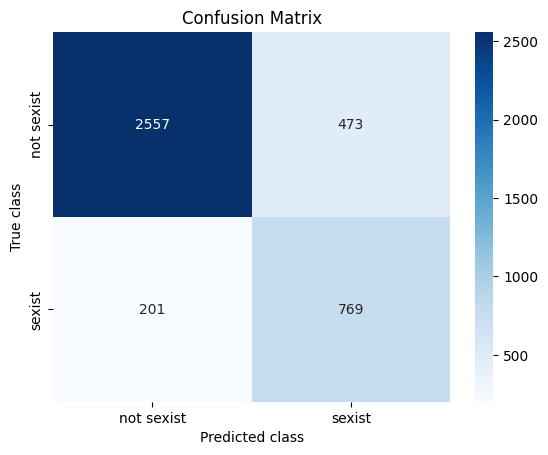

In [149]:
confusionMatrix = confusion_matrix(labels, predictions)
sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not sexist', 'sexist'], yticklabels=['not sexist', 'sexist'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

# Salvando o modelo e carregando

In [150]:
tokenizer.save_pretrained("sexism_model")
model.save_pretrained("sexism_model")

In [ ]:
# Load model

from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained("sexism_model")
model = BertForSequenceClassification
model = model.from_pretrained("sexism_model")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def predict(text):
    inputs = tokenizer(text, return_tensors="pt") # return_tensors="pt" will return PyTorch tensors
    inputs = {k: v.to(device) for k, v in inputs.items()}
    outputs = model(**inputs)
    logits = outputs.logits
    return torch.argmax(logits, dim=-1).item()

predict("A woman or a man can do anything they want")

1